<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1">Data Loading</a></span></li><li><span><a href="#Rooftop-Items" data-toc-modified-id="Rooftop-Items-2">Rooftop Items</a></span></li><li><span><a href="#Rooftop-Statistics" data-toc-modified-id="Rooftop-Statistics-3">Rooftop Statistics</a></span></li><li><span><a href="#Histogram-Graphs" data-toc-modified-id="Histogram-Graphs-4">Histogram Graphs</a></span></li><li><span><a href="#Building-Sampling" data-toc-modified-id="Building-Sampling-5">Building Sampling</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-6">Appendix</a></span></li></ul></div>

In [63]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
from scipy.stats import gaussian_kde
from PIL import Image
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

# Data Loading

Load the data and view a sample of the data frame. 
Surface details contains a list of named items on a rooftop. Their corresponsding quantity can be found in the quanity column.

In [2]:
df_b = pd.read_csv("../assets/data/manhattan/buildings.csv", converters={'gps': lambda x: [float(coord) for coord in x.split(',')],
                                                     'quantity': lambda x: [int(quantity) for quantity in x.split(',')],
                                                     'surface details': lambda x: list(reversed(x.split(',')))})
df_b[['lat','lon']] = pd.DataFrame(df_b.gps.tolist(), index= df_b.index)
print("Buildings")
display(df_b.head())
print("Rooftop Items Count")
df_r = pd.read_csv("../assets/data/manhattan/rooftop-items.csv")
display(df_r.head())

Buildings


,uid,city,gps,pictures,surface details,quantity,Notes,lat,lon
0,937428,manhattan,"[40.7675615, -73.9900951]",937428_rgb_unlabeled.jpg (https://dl.airtable....,"[enclosed-water-tower, multi-level, small-buil...","[1, 2, 2, 17]",NaN,40.767561,-73.990095
1,675199,manhattan,"[40.7673462, -73.9894818]",675199_rgb_unlabeled.jpg (https://dl.airtable....,"[air-vents, small-rooftop-entrance]","[1, 2]",NaN,40.767346,-73.989482
2,828544,manhattan,"[40.76513, -73.98733]",828544_rgb_unlabeled.jpg (https://dl.airtable....,[empty],[1],NaN,40.765130,-73.987330
3,287290,manhattan,"[40.7662, -73.9865]",287290_lidar_unlabeled.png (https://dl.airtabl...,"[chimney, ac-unit, small-rooftop-entrance]","[3, 3, 2]",NaN,40.766200,-73.986500
4,338004,manhattan,"[40.76776, -73.98988]",338004_rgb_unlabeled.jpg (https://dl.airtable....,"[billboard, air-vents, small-rooftop-entrance]","[1, 4, 1]",NaN,40.767760,-73.989880


Rooftop Items Count


,Name,Notes,pictures,buildings,count
0,any-ducts,sheet-metal air-ducts,download (1).jpg (https://dl.airtable.com/.att...,"344094,1255910,516923,711032,482686,405168,549...",8
1,multi-level,building has multiple levels. Quantity indicat...,NaN,"937428,399314,622247,122787,400163,516923,8282...",14
2,water-tower,water tower is on the surface of the roof,download (2).jpg (https://dl.airtable.com/.att...,"117413,250483,330453,193082,1284,546407",6
3,air-vents,small vents on top of the roof,937428_rgb_unlabeled.jpg (https://dl.airtable....,"937428,675199,338004,252956,117413,344094,8282...",23
4,ac-unit,air conditioning unit,Instalation with Large AC units showing discon...,"287290,157037,319704,402190,622247,516923,7499...",13


In [3]:
df_b

,uid,city,gps,pictures,surface details,quantity,Notes,lat,lon
0,937428,manhattan,"[40.7675615, -73.9900951]",937428_rgb_unlabeled.jpg (https://dl.airtable....,"[enclosed-water-tower, multi-level, small-buil...","[1, 2, 2, 17]",NaN,40.767561,-73.990095
1,675199,manhattan,"[40.7673462, -73.9894818]",675199_rgb_unlabeled.jpg (https://dl.airtable....,"[air-vents, small-rooftop-entrance]","[1, 2]",NaN,40.767346,-73.989482
2,828544,manhattan,"[40.76513, -73.98733]",828544_rgb_unlabeled.jpg (https://dl.airtable....,[empty],[1],NaN,40.765130,-73.987330
3,287290,manhattan,"[40.7662, -73.9865]",287290_lidar_unlabeled.png (https://dl.airtabl...,"[chimney, ac-unit, small-rooftop-entrance]","[3, 3, 2]",NaN,40.766200,-73.986500
4,338004,manhattan,"[40.76776, -73.98988]",338004_rgb_unlabeled.jpg (https://dl.airtable....,"[billboard, air-vents, small-rooftop-entrance]","[1, 4, 1]",NaN,40.767760,-73.989880
...,...,...,...,...,...,...,...,...,...
107,461736,manhattan,"[40.75141, -73.98438]",461736_rgb_unlabeled.jpg (https://dl.airtable....,[small-rooftop-entrance],[1],NaN,40.751410,-73.984380
108,230772,manhattan,"[40.75132, -73.98414]",230772_rgb_unlabeled.jpg (https://dl.airtable....,"[multi-level, seating, human-occupation]","[2, 1, 1]",NaN,40.751320,-73.984140
109,1284,manhattan,"[40.75128, -73.98402]",1284_rgb_unlabeled.jpg (https://dl.airtable.co...,"[skylight, water-tower, small-building]","[1, 3, 2, 3]",NaN,40.751280,-73.984020
110,667160,manhattan,"[40.75082, -73.98373]",667160_rgb_unlabeled.jpg (https://dl.airtable....,"[skylight, small-rooftop-entrance, small-build...","[1, 1, 1]",NaN,40.750820,-73.983730


# Rooftop Items

Likelihood of having a rooftop item on a building.

In [4]:
remove_list = ['pools', 'debris', 'solar-panel', 'human-occupation', 'empty', 'large-building', 'billboard', 'construction', 'multi-level']
items = np.unique([item for sublist in df_b['surface details'].values
                   for item in sublist if item not in remove_list]).tolist()
default_row = {k: 0 for k in items}
# This is a dataframe where each row is a building and each column is a different rooftip item
records_vector = []
# This is a dataframe where each row simply lists the amount footop item and the quantity of items on a roof
records_simple = []

for index, row in df_b.iterrows():
    new_row = default_row.copy()
    changes = {item: quantity for quantity, item in zip(row['quantity'], row['surface details']) if item not in remove_list}
    new_row.update(changes)
    records_vector.append(new_row)
    for k,v in new_row.items():
        records_simple.append({'Name': k, "Quantity": v})
          
df_vec = pd.DataFrame.from_records(records_vector)
df_simp = pd.DataFrame.from_records(records_simple)

print("Building View of Data")
display(df_vec.head())
print("Item View of Data")
display(df_simp.head())

Building View of Data


,ac-unit,air-vents,any-ducts,chimney,enclosed-water-tower,seating,skylight,small-building,small-rooftop-entrance,tarp,vegetation,water-tower
0,0,17,0,0,1,0,0,2,0,0,0,0
1,0,1,0,0,0,0,0,0,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,3,0,0,0,0,2,0,0,0
4,0,4,0,0,0,0,0,0,1,0,0,0


Item View of Data


,Name,Quantity
0,ac-unit,0
1,air-vents,17
2,any-ducts,0
3,chimney,0
4,enclosed-water-tower,1


In [84]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_simp[df_simp['Name'] == 'water-tower'])

             Name  Quantity
11    water-tower         0
23    water-tower         0
35    water-tower         0
47    water-tower         0
59    water-tower         0
71    water-tower         0
83    water-tower         0
95    water-tower         1
107   water-tower         0
119   water-tower         0
131   water-tower         0
143   water-tower         0
155   water-tower         0
167   water-tower         0
179   water-tower         0
191   water-tower         0
203   water-tower         0
215   water-tower         0
227   water-tower         0
239   water-tower         0
251   water-tower         0
263   water-tower         0
275   water-tower         0
287   water-tower         0
299   water-tower         0
311   water-tower         0
323   water-tower         0
335   water-tower         0
347   water-tower         1
359   water-tower         0
371   water-tower         0
383   water-tower         0
395   water-tower         0
407   water-tower         0
419   water-tower   

# Rooftop Statistics

In [5]:
df_vec.describe()

,ac-unit,air-vents,any-ducts,chimney,enclosed-water-tower,seating,skylight,small-building,small-rooftop-entrance,tarp,vegetation,water-tower
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,0.276786,1.125000,0.107143,0.053571,0.035714,0.116071,0.508929,0.446429,0.875000,0.026786,0.017857,0.098214
std,0.882358,3.895308,0.452364,0.324365,0.186411,0.846248,0.995445,0.898841,0.587022,0.210526,0.133027,0.444381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,4.000000,28.000000,3.000000,3.000000,1.000000,8.000000,7.000000,5.000000,2.000000,2.000000,1.000000,3.000000


In [40]:
asset_order = list(df_vec.mean().sort_values(ascending=False).index)
df_vec.mean().round(2).sort_values(ascending=False)

air-vents                 1.12
small-rooftop-entrance    0.88
skylight                  0.51
small-building            0.45
ac-unit                   0.28
seating                   0.12
any-ducts                 0.11
water-tower               0.10
chimney                   0.05
enclosed-water-tower      0.04
tarp                      0.03
vegetation                0.02
dtype: float64

In [41]:
df_vec.std().round(2).sort_values(ascending=False)

air-vents                 3.90
skylight                  1.00
small-building            0.90
ac-unit                   0.88
seating                   0.85
small-rooftop-entrance    0.59
any-ducts                 0.45
water-tower               0.44
chimney                   0.32
tarp                      0.21
enclosed-water-tower      0.19
vegetation                0.13
dtype: float64

# Histogram Graphs

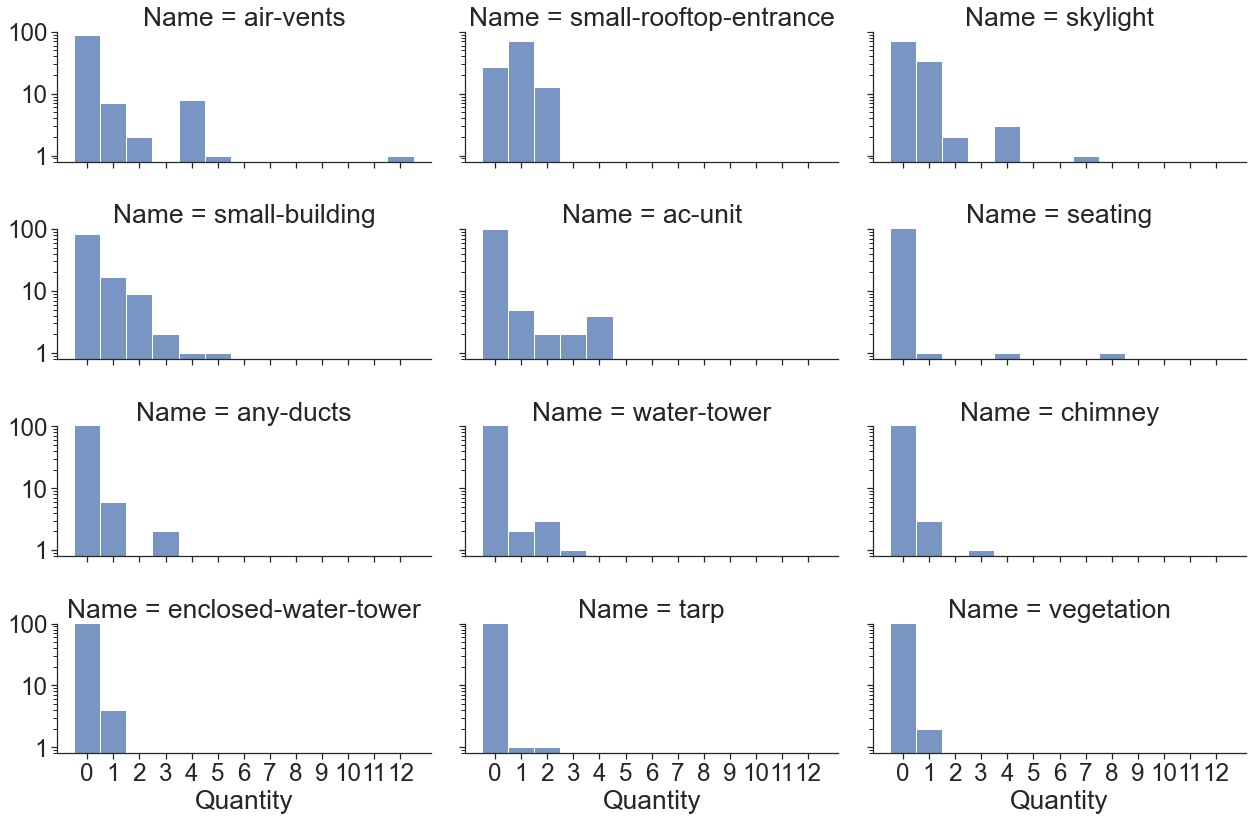

In [99]:
sns.set(style="ticks", font_scale=2.2, rc={"axes.facecolor": (0, 0, 0, 0)})
df = df_simp
# Initialize the FacetGrid object
g = sns.FacetGrid(df, col="Name",  aspect=2, col_wrap=3, col_order=asset_order)
# hist_kws = {'width': .4, "range": [0.0,12]}
kde_kws = {'clip': (-1.0, 12.0)}
# Draw the densities in a few steps
# g.map(sns.distplot, "Quantity", kde=True, bins=12, hist_kws=hist_kws, kde_kws=kde_kws)
g.map(sns.histplot, "Quantity", kde=False, bins=12, binwidth=1.0, binrange=[0.0,12], discrete=True)
g.set(yscale='log')
ticks = [1, 10, 100]
labels = [i for i in ticks]
xticks = range(13)
xlabels = [i for i in xticks]
g.set(yticks = ticks, yticklabels = labels, xticks=xticks, xticklabels=xlabels)
g.set(ylim=(0.8, 100))
g.savefig('../assets/imgs/hist.pdf')
# g.fig.get_axes()[0].yaxis.set_minor_locator(mticker.LogLocator(base=10, subs='all'))
# locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
# g.fig.get_axes()[0].yaxis.set_minor_locator(locmin)
# g.fig.get_axes()[0].yaxis.set_minor_formatter(mticker.NullFormatter())
# # g.fig.get_axes()[0].yaxis.set_minor_formatter(mticker.NullFormatter())
# g.fig.get_axes()[0].grid(True, which="Minor")  

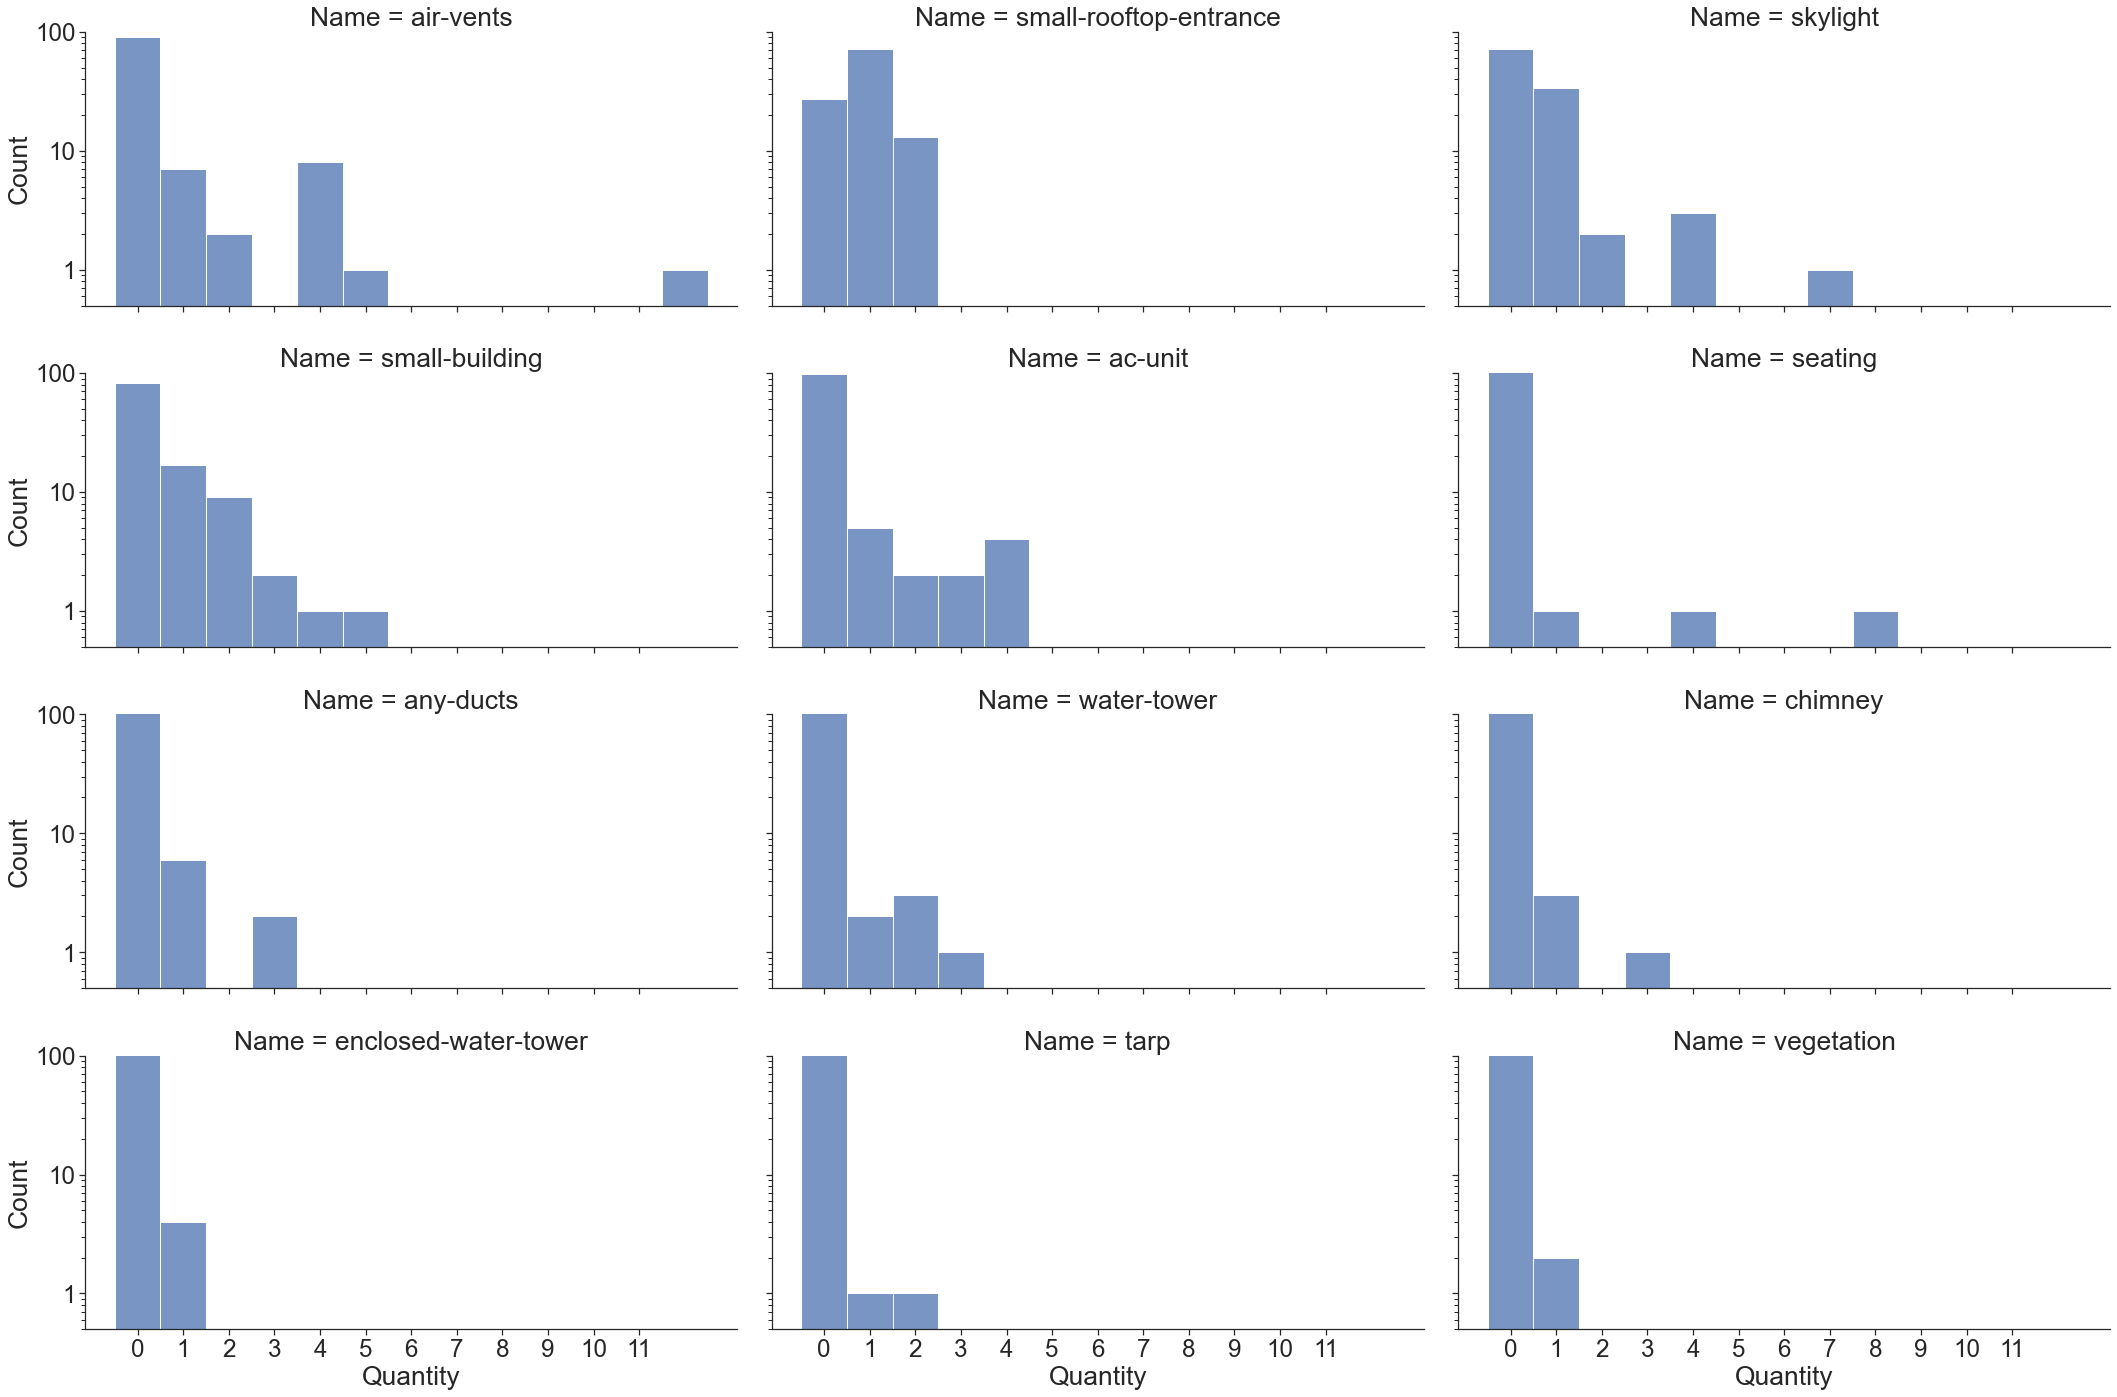

In [94]:
sns.set(style="ticks", font_scale=2.2, rc={"axes.facecolor": (0, 0, 0, 0)})
df = df_simp
# Initialize the FacetGrid object
g = sns.displot(df, x="Quantity", col="Name", kind='hist', aspect=2, col_wrap=3, 
                col_order=asset_order, bins=12, binwidth=1.0, binrange=[0.0,12], 
                discrete=True )

g.set(yscale='log')
ticks = [1, 10, 100]
labels = [i for i in ticks]
xticks = range(12)
xlabels = [i for i in xticks]
g.set(yticks = ticks, yticklabels = labels, xticks=xticks, xticklabels=xlabels)
g.set(ylim=(0.5, 100))
# g.savefig('../assets/imgs/hist.pdf')

In [9]:
SEED = 2
np.random.seed(SEED)
def histogram_sampling(x, size=None):
    if size is None:
        size=x.shape[0]
    quantities, counts = np.unique(x, return_counts=True)
    probs = counts / size
    return np.random.choice(quantities, size=size, p=probs)
def kde_sampling(x, size=None):
    if size is None:
        size=x.shape[0]
    kde = gaussian_kde(x)
    return np.maximum(kde.resample(x.shape[0]).squeeze() + 0.5, 0).astype(np.int)

records = []
for item in items:
    x = df_vec[item].values
    x_pred_kde = kde_sampling(x)
    x_pred_hist = histogram_sampling(x)
    records_x = [{'Name': item, 'Quantity': x_, 'Source': 'Manhattan Data'} for x_ in x]
    records_x_pred_kde = [{'Name': item, 'Quantity': x_, 'Source': 'KDE Sampling'} for x_ in x_pred_kde]
    records_x_pred_hist = [{'Name': item, 'Quantity': x_, 'Source': 'Histogram Sampling'} for x_ in x_pred_hist]
    records.extend(records_x)
    records.extend(records_x_pred_hist)
    records.extend(records_x_pred_kde)

df_kde = pd.DataFrame.from_records(records)

In [10]:
# sns.set(style="white", font_scale=1.5, rc={"axes.facecolor": (0, 0, 0, 0)})
# g = sns.FacetGrid(df_kde, col="Name",  aspect=2, hue="Source", col_wrap=3, legend_out =True)
# g.map(sns.distplot, "Quantity", kde=False, bins=range(0,11), hist_kws={'width': .4})
# g.add_legend()

In [11]:
allowed_columns = ['ac-unit', 'small-rooftop-entrance', 'air-vents', 'skylight']
# df_kde_filt = df_kde[df_kde['Name'].isin(allowed_columns)]
df_kde_filt = df_kde
df_kde_filt = df_kde_filt[df_kde_filt['Quantity'] < 10]

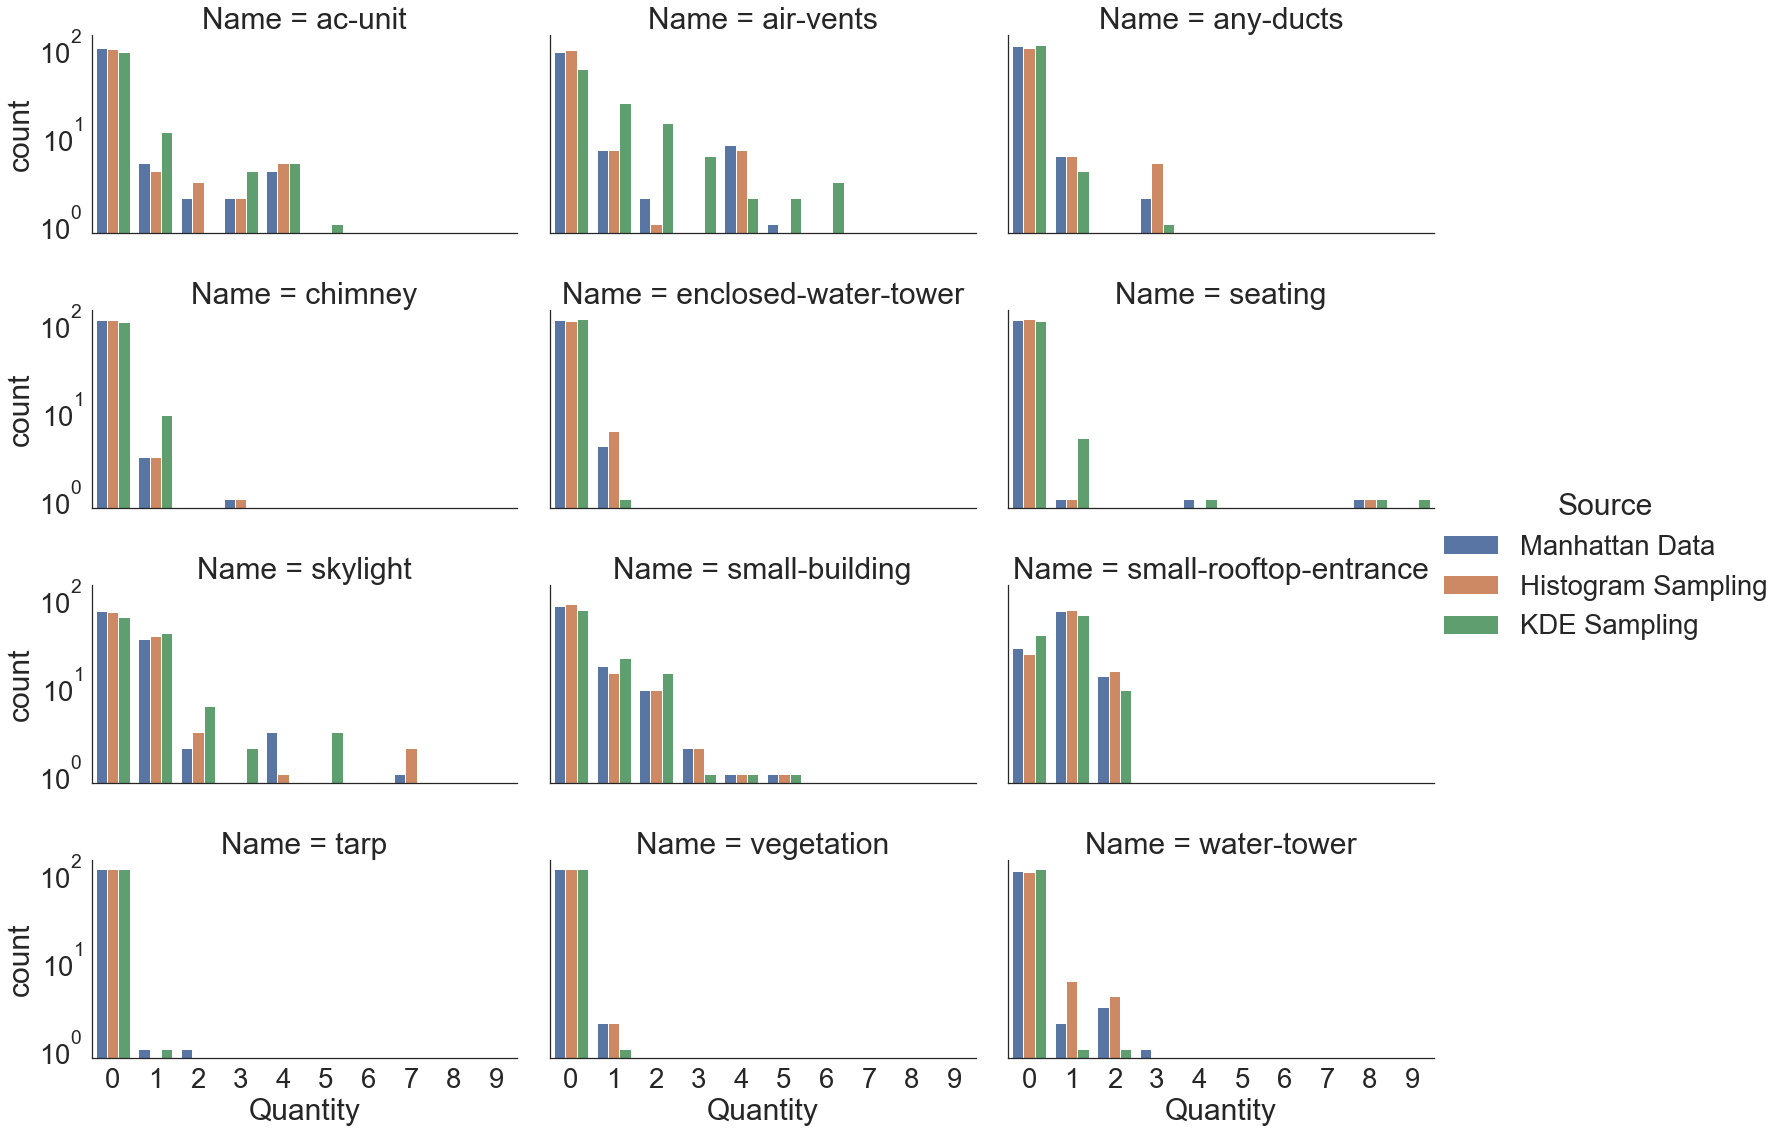

In [12]:

sns.set(style="white", font_scale=2.5, rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.catplot(x="Quantity", hue="Source", col="Name", col_wrap=3,
                data=df_kde_filt, kind="count", aspect=1.7, height=4);

g.fig.get_axes()[0].set_yscale('log')
# g.savefig('../assets/imgs/hist_sample_kde.pdf')
# for ax in g.axes:
#     ax.set(yscale='log')

# Building Sampling

How were the buildings samples? It was **not** uniform. 

* Start near 10th Ave and West 57th street.
* Pick a block and start sampling buildings
* Pick buildings that are mostly flat like
  * No point sampling buildings we will never land on
* Randomly pick another block that is nearby

In [13]:
from folium.plugins import MousePosition
import io
import folium
m = folium.Map(location=[40.76483, -73.98962], zoom_start=16, tiles='Stamen Terrain')
for index, row in df_b.iterrows():
#     folium.Marker(row['gps']).add_to(m)
    folium.Circle(radius=10, location=row['gps'], fill=True).add_to(m)
MousePosition().add_to(m)
# png = m._to_png(delay=3, window_size=(700, 700))
# png = m._to_png(delay=3)
# image = Image.open(io.BytesIO(png))
# image.save('../assets/imgs/map_ny.png')
m

In [23]:
import plotly.express as px
fig = px.scatter_mapbox(df_b, lat="lat", lon="lon",zoom=15.8, height=300, )
fig.update_mapboxes(bearing=118)
fig.update_traces(marker_size=10)
fig.update_layout(mapbox_style="streets", mapbox=dict(center=dict(lat=40.76536, lon=-73.98898)), mapbox_accesstoken="pk.eyJ1IjoiamRjYXN0YSIsImEiOiJjajUwNzZlbmowMXN1MnlwY3kxM3BqYnMzIn0.I4Aj5sCOPcAfze-71evNIQ")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_image("../assets/imgs/map_ny_vector.pdf")
fig.show()


# Appendix

In [ ]:
# SEED = 2
# np.random.seed(SEED)
# column_name = 'ac-unit'
# x = df_vec[column_name].as_matrix()
# print(x)
# kde = gaussian_kde(x)
# x_pred = np.maximum(kde.resample(x.shape[0]).squeeze() + 0.5, 0).astype(np.int)
# print(x_pred)
# print(np.unique(x))
# print(np.unique(x_pred))

In [ ]:

class QuantitySampler(object):
    """Performs quantity sampling of roof top objects
    Uses a provided Pandas DataFrame where each row is a building observation and 
    a column is a rooftop object type. The cell contains the quantity observed.
    
    """

    def __init__(self, df, fit='histogram'):
        """Pass in a dataframe and specify if you want sampling to be from a histogram or 
        a kernel density estimator (kde).
        
        Arguments:
            df {DataFrame} -- DataFrame of Data
        
        Keyword Arguments:
            fit {str} -- How to sample from data. Histogram is just a weighted random choice (default: {'histogram'})
        """

        self.df = df
        self.fit = fit

        if fit == 'histogram':
            self.set_up_histogram()
        else:
            raise NotImplementedError("Have not implemented kde yet")
            pass

    def sample(self, key, size=1):
        if self.fit == 'histogram':
            quantity = self.histogram_sampling(**self.histogram_meta[key], size=size)
            return quantity if size > 1 else quantity[0]

    def set_up_histogram(self):
        items = self.df.columns
        histogram_meta = {}
        # Iterate through each column in dataframe
        for item in items:
            x = self.df[item].values
            quantities, counts = np.unique(x, return_counts=True)
            histogram_meta[item] = dict(quantities=quantities, probabilities=counts/x.shape[0])
        self.histogram_meta = histogram_meta
    
    def histogram_sampling(self, quantities, probabilities, size=1):
        return np.random.choice(quantities, size=size, p=probabilities)
    
QuantitySampler(df_vec, "histogram").sample('ac-unit')